In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import random
import networkx as nx
import pandas as pd


In [6]:
df= pd.read_csv("World.csv")
df.head()

,Origen,Destino,ConexionAeropuertos
0,Papua New Guinea,Australia,19
1,Papua New Guinea,Philippines,5
2,Papua New Guinea,Indonesia,2
3,Papua New Guinea,Solomon Islands,2
4,Papua New Guinea,Hong Kong,2


In [8]:
flights_graph = nx.from_pandas_edgelist(df, source= "Origen",target= "Destino")

In [10]:
print(flights_graph)

Graph with 229 nodes and 2852 edges


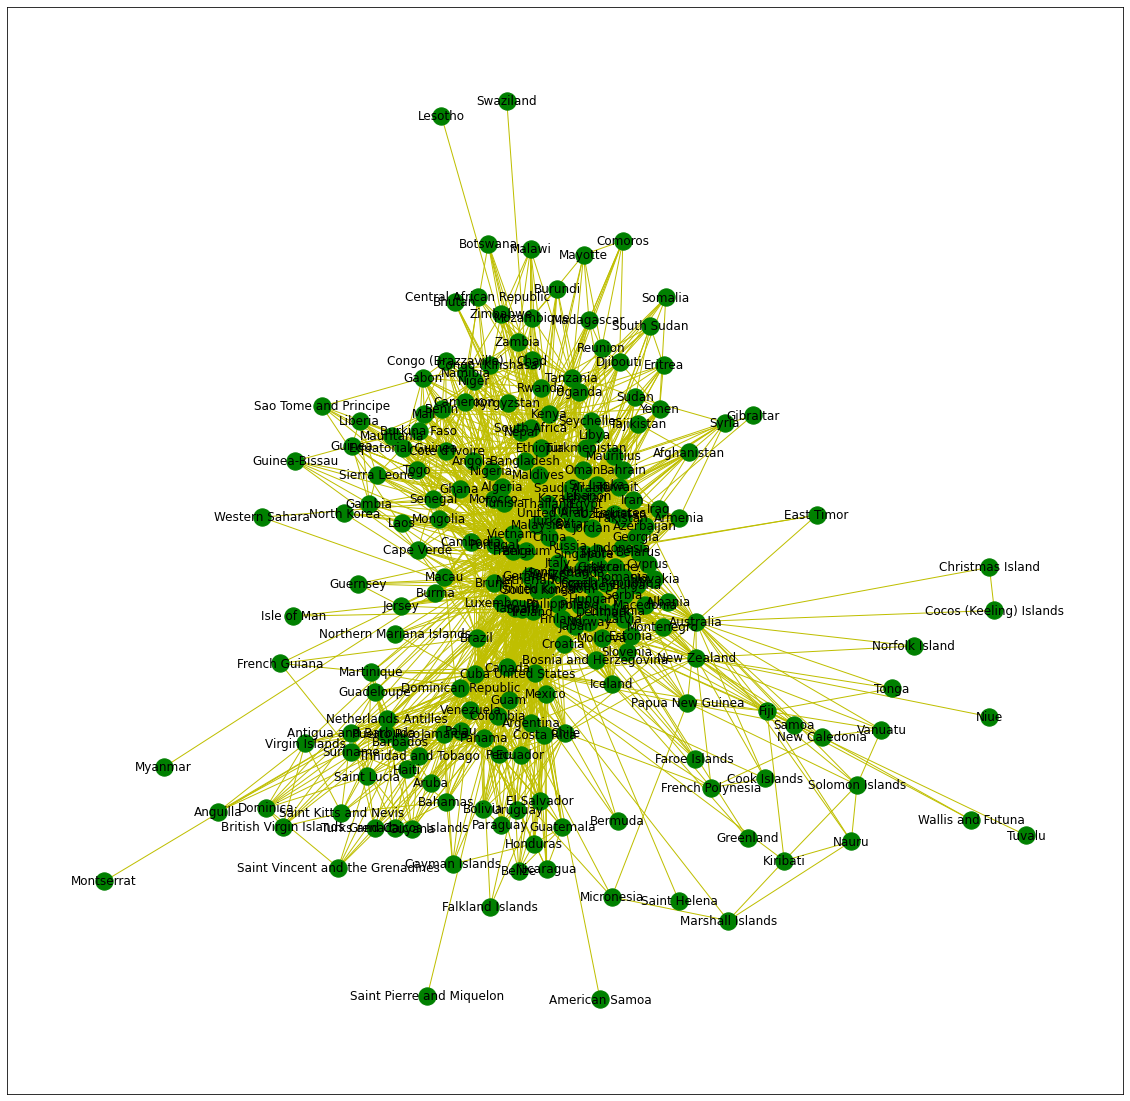

In [26]:
plt.figure(figsize=(20,20))
nx.draw_networkx(flights_graph, with_labels = True, node_color= 'g', edge_color='y')


 PARCIAL 1 TDA 2

In [14]:
print('Diámetro:', nx.diameter(flights_graph))

Diámetro: 5


In [28]:
def grado_promedio(grafo):
    """
    :param grafo:
    :return: grado promedio (k) del grafo
    """
    total = 0
    for v in grafo:
        total += len(list(grafo.neighbors(v)))
    return total / len(grafo)

In [30]:
print('Grado Promedio:',grado_promedio(flights_graph))

Grado Promedio: 24.90829694323144


In [62]:
print('Coeficiente de Clustering Promedio:',nx.average_clustering(flights_graph))

Coeficiente de Clustering Promedio: 0.6601565365859736


In [104]:
 nx.has_bridges(flights_graph)

True

In [105]:
list(nx.bridges(flights_graph))

[('Fiji', 'Tuvalu'),
 ('United States', 'American Samoa'),
 ('United Kingdom', 'Saint Helena'),
 ('Canada', 'Saint Pierre and Miquelon'),
 ('Antigua and Barbuda', 'Montserrat'),
 ('New Zealand', 'Niue'),
 ('South Africa', 'Lesotho'),
 ('South Africa', 'Swaziland'),
 ('Burma', 'Myanmar')]

In [109]:
nx.betweenness_centrality(flights_graph)

{'Papua New Guinea': 0.0029144579985688726,
 'Australia': 0.05396712680185675,
 'Philippines': 0.0042322766175759,
 'Indonesia': 0.0035924256107133777,
 'Solomon Islands': 0.00014644120390358282,
 'Hong Kong': 0.012754248578738416,
 'Fiji': 0.021141378015370412,
 'Japan': 0.020035132237902948,
 'Singapore': 0.013502839615083348,
 'China': 0.029591274905900435,
 'Micronesia': 0.00014072442486539404,
 'Greenland': 0.0,
 'Denmark': 0.009929451735101803,
 'Iceland': 0.0030293107699068357,
 'Finland': 0.001395755810962359,
 'Norway': 0.001735567839875596,
 'Netherlands': 0.03277211291345285,
 'Sweden': 0.0013601377014614009,
 'United States': 0.15312826033467095,
 'Belgium': 0.0255336820467668,
 'France': 0.1066582564383836,
 'Germany': 0.03793083275314773,
 'United Kingdom': 0.07949572806991673,
 'Canada': 0.04502321245880298,
 'Switzerland': 0.008252153319960718,
 'Spain': 0.03799772341776959,
 'Ireland': 0.00301763708763837,
 'Faroe Islands': 0.0,
 'Hungary': 0.0013394166360651385,
 'Pol

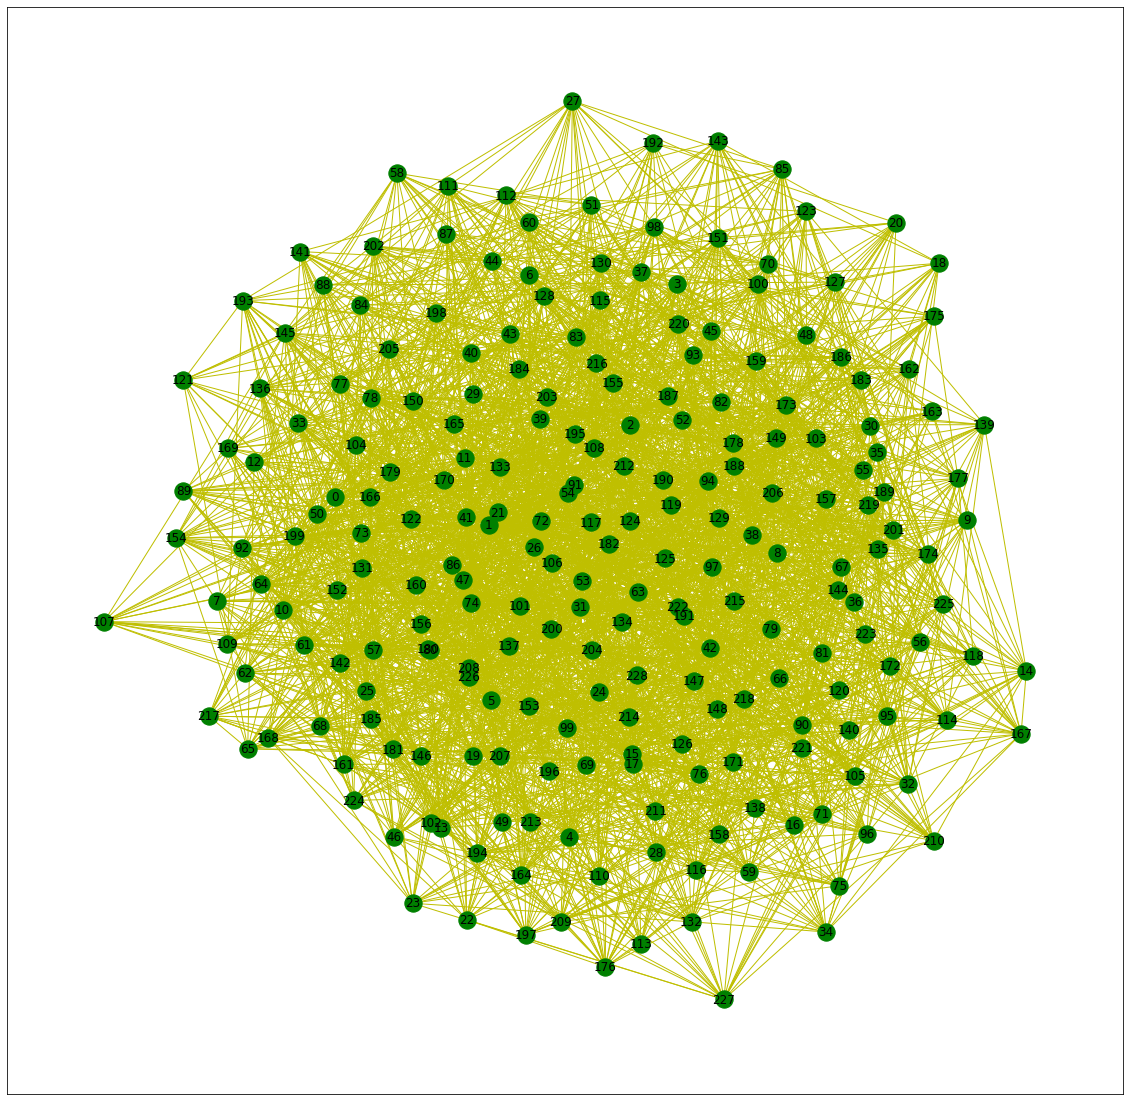

In [113]:
erdos_renyi_graph= nx.erdos_renyi_graph(229,0.11)
plt.figure(figsize=(20,20))
nx.draw_networkx(erdos_renyi_graph, with_labels = True, node_color= 'g', edge_color='y')

In [114]:
print('Coeficiente de Clustering Promedio Erdos Renyi:',nx.average_clustering(erdos_renyi_graph))

Coeficiente de Clustering Promedio Erdos Renyi: 0.11077508395626687


In [120]:
def alfa_preferential_attachment(grafo, x_m):
    """
    Calcula por maxima verosimilitud el valor del exponente de la ley de potencias a la que corresponde un grafo.
    :param grafo:
    :param x_m: valor a partir del cual se empieza a cumplir la ley de potencias
    :return: alfa
    """
    sumatoria = 0
    for v in grafo:
        cant_ady = len(list(grafo.neighbors(v)))
        if cant_ady >= x_m:
            sumatoria += ln(cant_ady / x_m)
    return 1 + len(grafo) / sumatoria

In [121]:
print(alfa_preferential_attachment(flights_graph, 10))

2.449890843293105


In [122]:
def elegir_preferntial(grafo, banned):
    grados_entrada = [0] * len(grafo)
    total = 0
    for v in range(len(grafo)):
        for w in grafo.neighbors(v):
            if w in banned:
                continue
            grados_entrada[w] += 1
            total += 1
    if total == 0:
        return None

    aleat = random.uniform(0, total)
    sumando = 0
    for i in range(len(grafo)):
        sumando += grados_entrada[i]
        if sumando > aleat:
            return i


def preferential_attachment(dirigido, alfa, cant, k):
    p = 1 - (1/(alfa - 1))
    valores = list(range(cant))
    g = nx.DiGraph() if dirigido else nx.Graph()
    g.add_nodes_from(valores)
    for v in range(cant):
        banned = set([v])
        for i in range(int(k)):
            preferential = random.uniform(0, 1) < p
            ya_agregado = False
            if preferential and v > 0:
                w = elegir_preferntial(g, banned)
                if w is not None:
                    banned.add(w)
                    g.add_edge(v, w)
                    ya_agregado = False
            if not ya_agregado:
                w = random.choice(list(set(range(cant)) - set([v])))
                g.add_edge(v, w)

    return g

In [126]:
pref_graph = preferential_attachment(False, 2.45, 229, 10)
print(pref_graph)


Graph with 229 nodes and 2837 edges


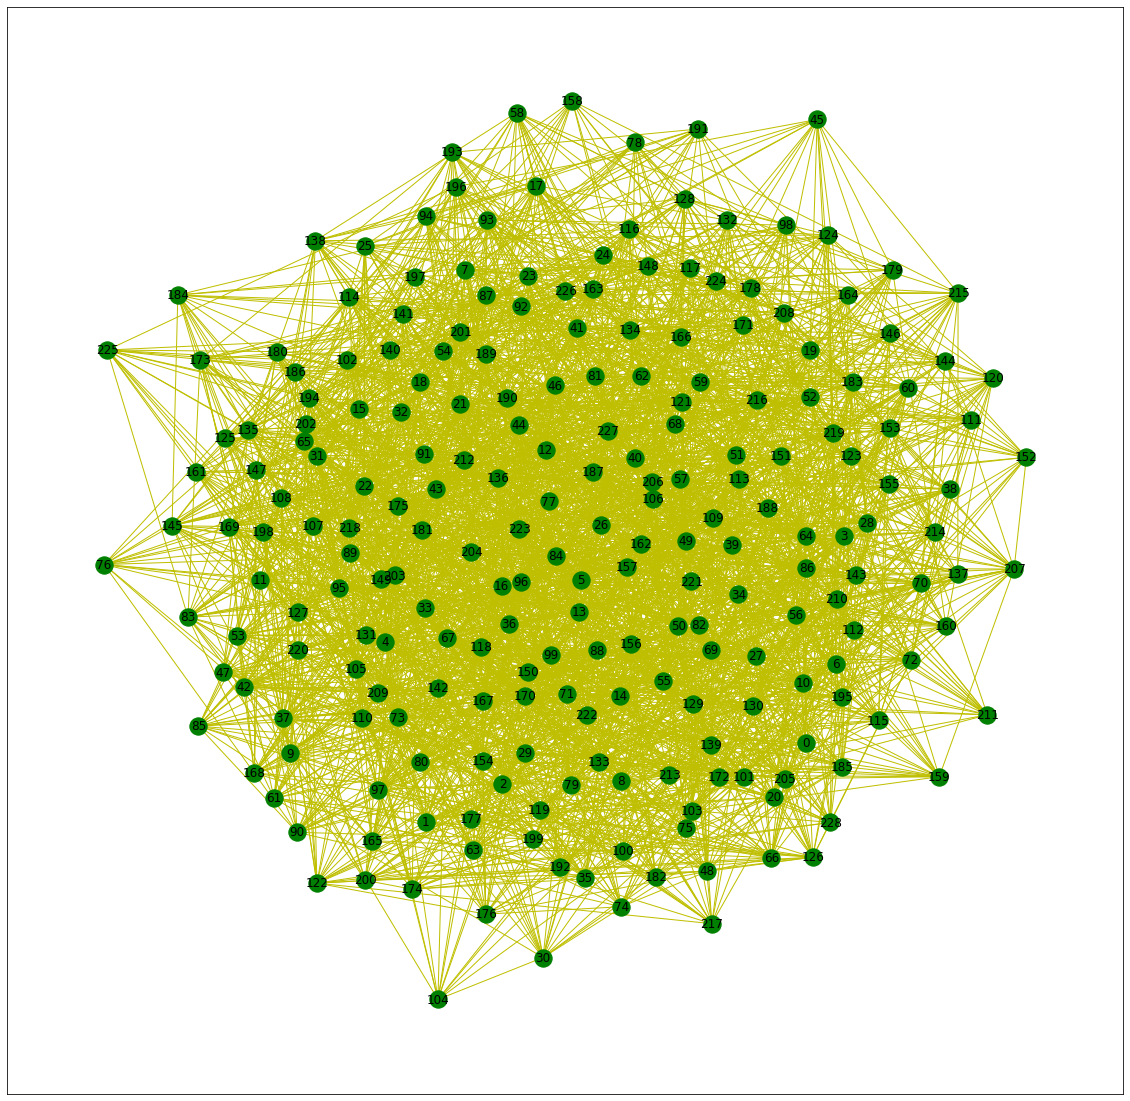

In [127]:
plt.figure(figsize=(20,20))
nx.draw_networkx(pref_graph, with_labels = True, node_color= 'g', edge_color='y')

In [130]:
from embeddings import anoymous_walks
caminos, embeding_flight = anoymous_walks(flights_graph, 7)
print(embeding_flight)

[1.84230746e-04 2.99374962e-04 4.60576864e-05 1.15144216e-05
 7.02379718e-04 3.45432648e-05 4.60576864e-05 3.45432648e-05
 5.75721080e-05 1.03629794e-04 3.91490334e-04 4.60576864e-05
 1.49687481e-04 5.18148972e-04 6.54019147e-03 1.15144216e-04
 1.15144216e-05 3.56947070e-04 3.45432648e-05 3.45432648e-05
 2.41802854e-04 1.72716324e-04 4.60576864e-05 5.75721080e-05
 2.17622568e-03 0.00000000e+00 1.15144216e-05 1.26658638e-04
 0.00000000e+00 2.30288432e-05 1.15144216e-04 0.00000000e+00
 3.45432648e-05 1.15144216e-05 6.79350875e-04 1.15144216e-05
 1.03629794e-04 3.45432648e-05 7.13894139e-04 1.15144216e-05
 3.45432648e-05 3.45432648e-05 5.06634551e-04 2.18774010e-04
 1.15144216e-05 1.61201902e-04 2.16471126e-03 3.45432648e-04
 3.33918226e-04 7.94495091e-04 2.31439874e-03 4.39850905e-02
 6.90865296e-05 1.15144216e-05 9.21153728e-05 0.00000000e+00
 2.30288432e-05 8.06009512e-05 2.30288432e-05 4.60576864e-05
 2.30288432e-05 8.63581620e-04 2.30288432e-05 2.30288432e-05
 2.30288432e-05 0.000000

In [131]:
caminos, embeding_erdos_renyi = anoymous_walks(erdos_renyi_graph, 7)
print(embeding_erdos_renyi)

[0.00000000e+00 1.03713150e-05 0.00000000e+00 0.00000000e+00
 9.33418346e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24455779e-04 0.00000000e+00
 0.00000000e+00 3.11139449e-05 1.79423749e-03 0.00000000e+00
 0.00000000e+00 9.33418346e-05 1.03713150e-05 0.00000000e+00
 4.14852598e-05 7.25992047e-05 0.00000000e+00 0.00000000e+00
 1.72163828e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.03713150e-05 0.00000000e+00 1.65941039e-04 0.00000000e+00
 0.00000000e+00 2.07426299e-05 7.25992047e-05 0.00000000e+00
 0.00000000e+00 3.11139449e-05 2.17797614e-04 6.22278897e-05
 0.00000000e+00 8.29705196e-05 1.50384067e-03 1.34827094e-04
 1.86683669e-04 2.17797614e-04 1.86683669e-03 4.09355801e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.03713150e-05 0.00000000e+00 2.07426299e-05
 0.00000000e+00 8.29705196e-05 0.00000000e+00 0.00000000e+00
 1.03713150e-05 0.000000

In [132]:
caminos, embeding_pref = anoymous_walks(pref_graph, 7)
print(embeding_pref)

[0.00000000e+00 0.00000000e+00 1.04078989e-05 0.00000000e+00
 1.04078989e-04 0.00000000e+00 0.00000000e+00 1.04078989e-05
 2.08157978e-05 0.00000000e+00 5.20394945e-05 2.08157978e-05
 0.00000000e+00 6.24473934e-05 1.64444803e-03 0.00000000e+00
 0.00000000e+00 6.24473934e-05 0.00000000e+00 0.00000000e+00
 9.36710901e-05 6.24473934e-05 4.16315956e-05 0.00000000e+00
 1.83179021e-03 0.00000000e+00 0.00000000e+00 1.04078989e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.04078989e-05 0.00000000e+00 1.76934281e-04 0.00000000e+00
 0.00000000e+00 1.04078989e-05 1.66526382e-04 1.04078989e-05
 0.00000000e+00 1.04078989e-05 1.45710585e-04 9.36710901e-05
 1.04078989e-05 5.20394945e-05 1.79015861e-03 1.76934281e-04
 2.08157978e-04 2.81013270e-04 1.99831659e-03 4.21311748e-02
 0.00000000e+00 0.00000000e+00 1.04078989e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.08157978e-05
 0.00000000e+00 1.56118484e-04 0.00000000e+00 0.00000000e+00
 1.04078989e-05 0.000000

In [133]:
def distancia_coseno(a, b):
    return 1 - np.inner(a, b) / (LA.norm(a) * LA.norm(b))

In [134]:
print(distancia_coseno(embeding_flight, embeding_erdos_renyi))

0.00047937308119272437


In [135]:
print(distancia_coseno(embeding_flight, embeding_pref))

0.00046344010459531404
